<a href="https://colab.research.google.com/github/Srijana-Shetty/NLP_for_Data_Analytics/blob/main/NLP_for_data_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spacy nltk wordcloud matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 107.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy           #language related module
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

nlp = spacy.load('en_core_web_sm')  #to get in english language

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
text = """
NLP in machine learning uses machine learning algorithms to enable computers to understand, interpret, and generate human language. It combines linguistics and computer science to analyze text and speech, allowing machines to perform tasks like sentiment analysis, translation, and chatbots by learning patterns from vast datasets.
"""
text

'\nNLP in machine learning uses machine learning algorithms to enable computers to understand, interpret, and generate human language. It combines linguistics and computer science to analyze text and speech, allowing machines to perform tasks like sentiment analysis, translation, and chatbots by learning patterns from vast datasets. \n'

In [12]:
doc = nlp(text)
doc


NLP in machine learning uses machine learning algorithms to enable computers to understand, interpret, and generate human language. It combines linguistics and computer science to analyze text and speech, allowing machines to perform tasks like sentiment analysis, translation, and chatbots by learning patterns from vast datasets. 

In [13]:
print("Token Details")
for token in doc:
  print(
      f"Text: {token.text:15} |"
      f"Lower: {token.lower_:12} |"
      f"Lemma: {token.lemma_:12} |"
      f"POS: {token.pos_:6} |"
      f"Dep: {token.tag_:6} |"
      f"Stop Word: {token.is_stop} |"
  )

Token Details
Text: 
               |Lower: 
            |Lemma: 
            |POS: SPACE  |Dep: _SP    |Stop Word: False |
Text: NLP             |Lower: nlp          |Lemma: NLP          |POS: PROPN  |Dep: NNP    |Stop Word: False |
Text: in              |Lower: in           |Lemma: in           |POS: ADP    |Dep: IN     |Stop Word: True |
Text: machine         |Lower: machine      |Lemma: machine      |POS: NOUN   |Dep: NN     |Stop Word: False |
Text: learning        |Lower: learning     |Lemma: learning     |POS: NOUN   |Dep: NN     |Stop Word: False |
Text: uses            |Lower: uses         |Lemma: use          |POS: VERB   |Dep: VBZ    |Stop Word: False |
Text: machine         |Lower: machine      |Lemma: machine      |POS: NOUN   |Dep: NN     |Stop Word: False |
Text: learning        |Lower: learning     |Lemma: learn        |POS: VERB   |Dep: VBG    |Stop Word: False |
Text: algorithms      |Lower: algorithms   |Lemma: algorithm    |POS: NOUN   |Dep: NNS    |Stop Word: False

In [14]:
print("Lemmatization Vs Stemming")
for token in doc:
  if token.is_alpha and not token.is_stop:
    print(f"Text: {token.text:15} | Lemma: {token.lemma_:12} | Stem: {stemmer.stem(token.text)}")

Lemmatization Vs Stemming
Text: NLP             | Lemma: NLP          | Stem: nlp
Text: machine         | Lemma: machine      | Stem: machin
Text: learning        | Lemma: learning     | Stem: learn
Text: uses            | Lemma: use          | Stem: use
Text: machine         | Lemma: machine      | Stem: machin
Text: learning        | Lemma: learn        | Stem: learn
Text: algorithms      | Lemma: algorithm    | Stem: algorithm
Text: enable          | Lemma: enable       | Stem: enabl
Text: computers       | Lemma: computer     | Stem: comput
Text: understand      | Lemma: understand   | Stem: understand
Text: interpret       | Lemma: interpret    | Stem: interpret
Text: generate        | Lemma: generate     | Stem: gener
Text: human           | Lemma: human        | Stem: human
Text: language        | Lemma: language     | Stem: languag
Text: combines        | Lemma: combine      | Stem: combin
Text: linguistics     | Lemma: linguistic   | Stem: linguist
Text: computer        | Lemm

In [15]:
def preprocess_for_visuals(doc):
  tokens = []
  for token in doc:
    if token.is_alpha and not token.is_stop:
      tokens.append(token.lemma_.lower())
  return tokens

clean_tokens = preprocess_for_visuals(doc)
clean_tokens

['nlp',
 'machine',
 'learning',
 'use',
 'machine',
 'learn',
 'algorithm',
 'enable',
 'computer',
 'understand',
 'interpret',
 'generate',
 'human',
 'language',
 'combine',
 'linguistic',
 'computer',
 'science',
 'analyze',
 'text',
 'speech',
 'allow',
 'machine',
 'perform',
 'task',
 'like',
 'sentiment',
 'analysis',
 'translation',
 'chatbot',
 'learn',
 'pattern',
 'vast',
 'dataset']

In [18]:
from collections import Counter

freq_dist = Counter(clean_tokens)
#freq_dist

print("Top 15 Words")
for w, f in freq_dist.most_common(15):
  print(f"{w:15} | {f}")

words = [w for w, f in freq_dist.most_common(10)]
freq = [f for w, f in freq_dist.most_common(10)]

#print(sum(freq_dist.values()))




Top 15 Words
machine         | 3
learn           | 2
computer        | 2
nlp             | 1
learning        | 1
use             | 1
algorithm       | 1
enable          | 1
understand      | 1
interpret       | 1
generate        | 1
human           | 1
language        | 1
combine         | 1
linguistic      | 1


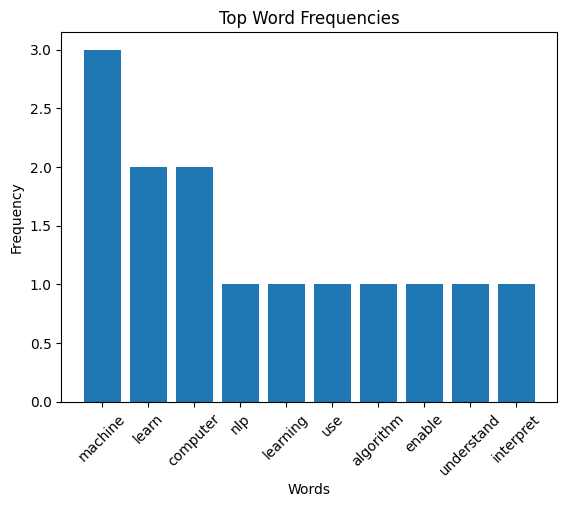

In [21]:
plt.bar(words, freq)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top Word Frequencies")
plt.xticks(rotation=45)
plt.show()

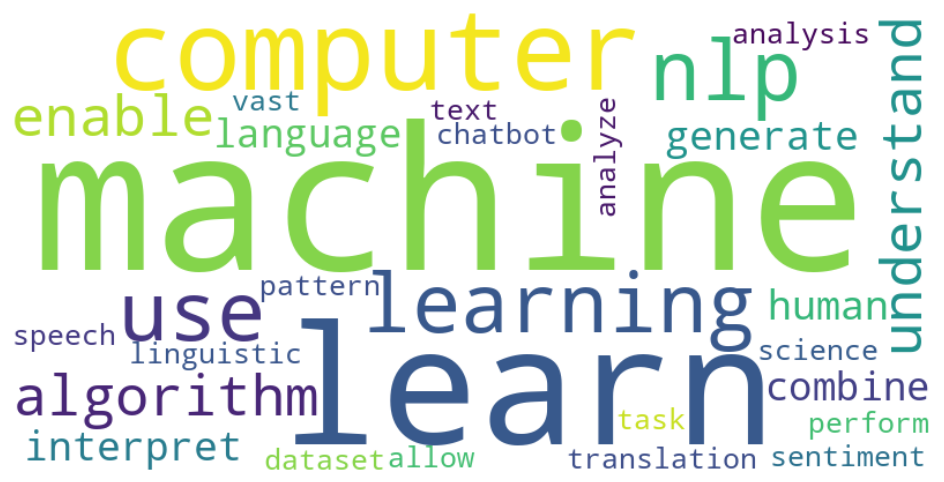

In [22]:
clean_text = " ".join(clean_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clean_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

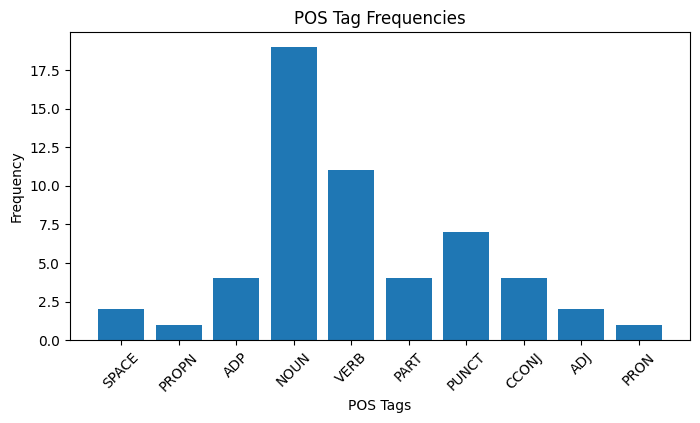

In [25]:
pos_counts = doc.count_by(spacy.attrs.POS)

labels = [doc.vocab[p].text for p in pos_counts.keys()]
values = list(pos_counts.values())

plt.figure(figsize=(8, 4))
plt.bar(labels, values)
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.title("POS Tag Frequencies")
plt.show()


In [26]:
for label, val in zip(labels, values):
  print(f"{label:10} | {val}")

SPACE      | 2
PROPN      | 1
ADP        | 4
NOUN       | 19
VERB       | 11
PART       | 4
PUNCT      | 7
CCONJ      | 4
ADJ        | 2
PRON       | 1


In [30]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

for sent in doc.sents:
  print(sent)
  displacy.render(sent,style="dep", jupyter=True)


NLP in machine learning uses machine learning algorithms to enable computers to understand, interpret, and generate human language.


It combines linguistics and computer science to analyze text and speech, allowing machines to perform tasks like sentiment analysis, translation, and chatbots by learning patterns from vast datasets. 

